<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/lession_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
from fastai.text import *

In [14]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/data_save.pkl'),
 PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [15]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [16]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [17]:
data_lm = TextDataBunch.from_csv(path,'texts.csv')

In [0]:
data_lm.save()

In [19]:
data = TextClasDataBunch.load(path)

FileNotFoundError: ignored

In [20]:
data_lm.show_batch()

text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the xxunk - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive


In [22]:
data_lm.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [23]:
data_lm.train_ds[0][0]

Text xxbos xxmaj riding xxmaj giants is a brilliant documentary that xxunk deep into the world of one of the most under - appreciated sports and brings to the surface a very human and raw emotion that only director xxmaj stacy xxmaj peralta could capture . xxmaj everything from the structure , to the players , to the amazing stock footage , to even the style in which this was filmed only xxunk the beauty and power behind the sport of surfing . xxmaj of all the surfing films that i have seen ( xxmaj endless xxmaj summer , xxmaj xxunk xxmaj xxunk , and xxmaj step xxmaj into xxmaj liquid ) this was the most consistent and relevant . xxmaj beginning with the early ages of surfing ( a brief history lesson ) lasting all the way till xxmaj laird 's infamous ride , xxmaj riding xxmaj giants goes further into the mind , heart , and soul of the sport than any of these other documentaries . xxmaj how does it do this ? xxmaj by giving us the whole story , from start to finish , without xxunk or xx

In [24]:
data_lm.train_ds[0][0].data[:10]

array([   2,    5, 1369,    5, 2435,   16,   13,  629,  460,   20])

In [25]:
data = (TextList.from_csv(path,'texts.csv',cols='text')
        .split_from_df(col=2)
        .label_from_df(cols=0)
        .databunch())

In [0]:
path = untar_data(URLs.IMDB)

In [29]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat')]

In [0]:
bs=48

In [31]:
data_lm = (TextList.from_folder(path)
            .filter_by_folder(include=['train','test','unsup'])
            .split_by_rand_pct(0.1)
            .label_for_lm()
            .databunch(bs=bs))


In [0]:
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path,'data_lm.pkl',bs=bs)

In [35]:
data_lm.show_batch()

idx,text
0,"piece of crap stayed on xxup tv this long ? xxmaj it 's terrible . xxmaj it makes me want to shoot someone . xxmaj it 's so fake that it is actually worse than a 1940s sci - fi movie . i 'd rather have a stroke than watch this nonsense . i remember watching it when it first came out . i thought , hey this could be"
1,"xxmaj lewis is still alive . xxup damn xxup you xxup lewis ! ! ! xxmaj damn you back to the pits of despair you came from ! ! ! xxmaj and as you 're on your way down , do n't hang onto me for support , because i 'm not giving any ! xxmaj lewis does n't deserve it ! ! xxmaj this movie does n't deserve it"
2,"xxmaj space ' that keep you watching in awed fascination just to see what new depths it can plumb , this movie is just common or garden bad ; bad with no distinguishing features . xxbos this sequel is nowhere near as good as the xxunk is lots of blood in this one , courtesy of the fight scenes . xxunk is a good xxunk fight scenes themselves are n't"
3,"and xxmaj billy xxmaj burke , who all inject a bit more life and background into the film . \n \n xxmaj while the ride is comfortable for the most part , xxmaj fracture slips a gear towards the end ; the shift from murder mystery to moral crusade feels a little bumpy , but nonetheless , strong performances and great artistic direction make xxmaj fracture a stylish ,"
4,found that the film 's language was a lot stronger than i thought it would be and the sex scenes were quite ... detailed . \n \n xxmaj on the whole i did n't enjoy this film - the storyline 's fault . xxbos xxmaj wow ! xxmaj this film is the kind of movie that brings tears to your eyes and warmth to your heart . xxmaj everyone


In [38]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)

In [39]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


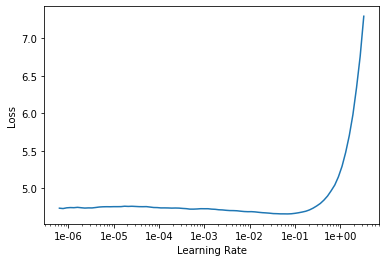

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.169304,4.019712,0.296014,23:29


In [0]:
learn.save('fit_head')

In [43]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos i discovered this movie via my xxunk for xxmaj jerry xxmaj goldsmith 's innovative ( for the period ) score ... highly recommended for its quintessential marriage of images and sounds ... 
 
  xxmaj the talent on view here , and the obvious xxunk its cast and crew have for this film ( evident in every frame ) make this a must see .,xxbos xxmaj how has this piece of crap stayed on xxup tv this long ? xxmaj it 's terrible . xxmaj it makes me want to shoot someone . xxmaj it 's so fake that it is actually worse than a 1940s sci - fi movie . i 'd rather have a stroke than watch this nonsense . i remember watching it when it first came out . i thought , hey this could be interesting , then i found out how absolutely , insanely , ridiculously stupid it really was . xxmaj it was so bad that i actually took out my pocket knife and stuck my hand to the table . 
 
  xxmaj please people , stop watching this 

In [0]:
learn.unfreeze()

In [45]:
learn.fit_one_cycle(1,1e-3,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.799812,3.732604,0.329191,26:32


In [46]:
learn.predict('I liked this movie because ',100,temperature=1.1,min_p=0.001)

'I liked this movie because  it brought back a few of the ideas that are " good " , but still found the edge of an early one like this ; you would give anything a try , an idea of just plain bad , good and bad everything so real . i laughed out loud by this guy saying in the first minute i really laughed the whole way through , why he was lying in the floor , that s as long as the scene on earth , the girl wearing a baseball mask , why he would n\'t allow her to show'

In [0]:
learn.save('stage-movie.pkl')

In [0]:
learn.save_encoder('fine_tuned_enc')

In [51]:
data_clas = (TextList.from_folder(path,vocab=data_lm.vocab)
        .split_by_folder(valid='test')
        .label_from_folder(classes=['neg','pos'])
        .filter_missing_y()
        .databunch(bs=20))
data_clas.save('tmp_clas')

TypeError: ignored